<a href="https://colab.research.google.com/github/jnqeras/ARC/blob/master/Copia_de_Homework_Assignment_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursive technical homework

## Motivation
We hope you have fun doing this task as well as learn something new.

Do not be discouraged if you find the task challenging. Feel free to research as much as you want on Google or any other resource to solve this task. You are welcome to copy code snippets from stackoverflow, tutorials, blog posts, etc to help you finish the task. Make sure you understand them though :)

The goal is to push yourself a little and see how you like solving new problems using scientific computing and data analysis.

**About colab**

Please create a duplicate of this notebook using File > Save a Copy in Drive. Share your solution via a link to your local copy of the notebook.

You can solve the entirety of this task using a free kernel running in the cloud. **Just click 'Connect' on the top right of the notebook**. You can use any python libraries you want *unless* explicitly told to code your own algorithm. **If a library you want to use is not already available from the colab runtime, go to 'Help' > 'Search code snippets' > Type 'Importing a library that is not in Colab' to learn how to install a library using pip**.


# Part 1
Understanding Stochastic Gradient Descent.
In this exercise, we want to implement [Stochastic Gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) without using a built-in optimizer, to understand how parameters are optimized at the low level.

Let's consider a toy problem of [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). The data generation process is such that we have one floating point variable $x \in [0,1]$, and one categorical variable $y\in \{0,1\}$. The Logistic Regression problem is to find the optimal parameters for the logistic function to predict the probability of $y$ given $x$.

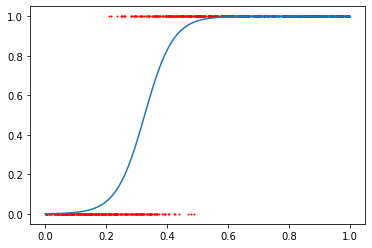

In the image above, the x and y axis correspond to the variables defined previously, with **the red "dots" the true data as generated by the process defined below, and the blue line is the optimal logistic decision function learned from the data**.

The optimal parameters can be found numerically using gradient descent. In this case, we will be using SGD (batched gradient descent) to optimize the two parameters in the logistic function, $\beta_1, \beta_2$.

If ${p(x)={\frac {1}{1+e^{-(\beta _{1}+\beta _{2}x)}}}}$, then we want to find $\beta_1, \beta_2$ such that the [negative log likelihood](https://en.wikipedia.org/wiki/Likelihood_function) is minimized. In this case, ${\ell =\sum _{k=1}^{K}\left(\,y_{k}\ln(p_{k})+(1-y_{k})\ln(1-p_{k})\right)}$, and the SGD formula is simply:
$\beta_i = \beta_{i-1} - \alpha * \nabla \ell$.

**The data generation process as well as the pseudo-code is provided for you below, your task is to fill in the appropriate pytorch code. *Do not use the built-in optimizer*, implement SGD using tensor operations alone.**


In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [6]:
# For reproducibility
torch.manual_seed(3)

In [7]:
# fixme: agregar tests para esta celda, aunque NO tiene código mío.
def generate_data():
  data = torch.rand(1000, 2)
  label = ((data[:,0]+0.3*data[:,1]) > 0.5).to(torch.int) #fixme: why does he do this?
  return data[:,0], label

Loss: 22.14712905883789
Loss: 20.886449813842773
Loss: 17.72907257080078
Loss: 14.984260559082031
Loss: 18.824119567871094
Loss: 18.797021865844727
Loss: 16.75469207763672
Loss: 15.88896369934082
Loss: 16.003225326538086
Loss: 13.419294357299805
Loss: 15.594013214111328
Loss: 12.254057884216309
Loss: 10.364975929260254
Loss: 14.274445533752441
Loss: 9.790668487548828
Loss: 14.352476119995117
Loss: 12.564419746398926
Loss: 10.88703727722168
Loss: 10.396328926086426
Loss: 12.59537124633789
Loss: 13.69104290008545
Loss: 12.19120979309082
Loss: 10.992256164550781
Loss: 12.158005714416504
Loss: 11.268655776977539
Loss: 9.546442031860352
Loss: 9.995362281799316
Loss: 11.640313148498535
Loss: 10.977800369262695
Loss: 11.853557586669922
Loss: 10.408225059509277
Loss: 1.8098206520080566
Loss: 13.117205619812012
Loss: 9.62712287902832
Loss: 8.121256828308105
Loss: 8.052849769592285
Loss: 11.694347381591797
Loss: 12.076536178588867
Loss: 10.821837425231934
Loss: 9.001903533935547
Loss: 9.23694324

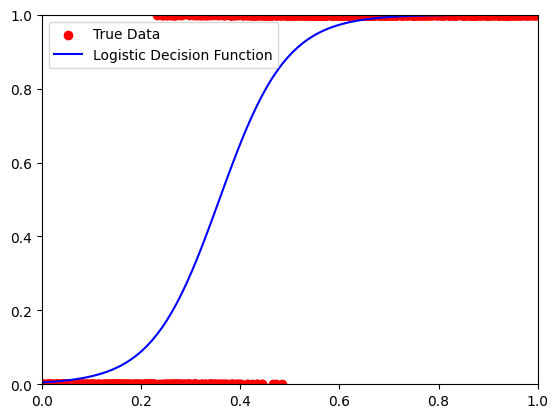

In [8]:
# fixme: agregar test para esta celda, que tiene código mío.
# fixme: consultar que cosas tengo que implementar para este tipo de soluciones, para todos los problemas.
input, label = generate_data() # input = torch.Size([1000]), label = torch.Size([1000])


# Make minibatches.
inputs = torch.split(input, 32) # 31 minibatches of torch.Size([32]), the last one (the 32nd) of torch.Size([8])
labels = torch.split(label, 32) # 31 minibatches of torch.Size([32]), the last one (the 32nd) of torch.Size([8])

# Assert that all batches of labels contain only 0s and 1s
for batch_labels in labels:
    assert ((batch_labels == 0) | (batch_labels == 1)).all().item(), "labels should contain only 0s and 1s"

# Define the two variables to optimize
b1 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True) # b1: tensor of size [1]. "requires_grad=True" flag ensures that gradients will be calculated for b1 during backpropagation.
b2 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True) # b2: tensor of size [1]

# Learning rate
alpha = 0.082

# Lists to store b1, b2, and losses
b1_values = []
b2_values = []
losses = []


# Store values for plotting before updating parameters
b1_values.append(b1.item())
b2_values.append(b2.item())

for epoch in range(15):
  # Initialize loss variable for this epoch
  for x, y in zip(inputs,labels): # x: tensor of size [32] or [8], y: tensor of size [32] or [8]
    # Calculate p_x as per formula above. p_x is the sigmoid function. The formula calculates the probability p(x) that x belongs to a particular class.
    p_x = (lambda x, b1, b2: 1 / (1 + torch.exp(-(b1 + b2 * x))))(x, b1, b2) # p_x: tensor of size [32] or [8]

    # Calculate the negative loss likelihood
    loss = -(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x)) # loss: tensor of size [32] or [8]
    # Sum the losses across the batch dimension to get a scalar value
    loss = torch.sum(loss) # loss: scalar tensor
    # Calculate the gradient of the loss w.r.t. the inputs
    loss.backward()
    # Store values for plotting before updating parameters
    losses.append(loss.item())

    # Update the parameters b according to SGD formula
    with torch.no_grad():
      b1 -= alpha * b1.grad # b1.grad: tensor of size [1]
      b2 -= alpha * b2.grad # b2.grad: tensor of size [1]
      # Store values for plotting before updating parameters
      b1_values.append(b1.item())
      b2_values.append(b2.item())
      losses.append(loss.item())

      #Manually zero the gradients after updating, to prevent gradient accumulation across iterations. In stochastic gradient descent (SGD) and its variants, you typically compute gradients and then update model parameters based on these gradients. If gradients accumulate across iterations, parameter updates would not reflect the gradient of the current mini-batch alone, but rather a cumulative effect of multiple mini-batches.
      b1.grad.zero_()
      b2.grad.zero_()

    # Print out the loss value
    print(f"Loss: {loss}")

# Final values of b1 and b2 after training
final_b1 = b1.item()
final_b2 = b2.item()

print(f"Final values: b1 = {final_b1}, b2 = {final_b2}")

# Reproduce the image above to validate your result.
# Plotting the results
plt.figure()

# Plot the true data points
plt.scatter(input.numpy(), label.numpy(), color='red', label='True Data')

# Plot the logistic decision function
with torch.no_grad():
    x_decision = torch.linspace(0, 1, 100) # x_decision: tensor of size [100]
    p_decision = torch.sigmoid(final_b1 + final_b2 * x_decision) # p_decision: tensor of size [100]
    plt.plot(x_decision.numpy(), p_decision.numpy(), linestyle='-', color='blue', label='Logistic Decision Function')

plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [9]:
def check_loss_behavior(losses):
    """
    Checks if the loss values are generally decreasing.

    Parameters:
    - losses: List of loss values recorded during training.

    Returns:
    - A message indicating whether the loss is decreasing, has fluctuations, or is unstable.
    """
    if len(losses) < 2:
        print("Not enough loss data to analyze.")
        return

    decreasing = all(earlier >= later for earlier, later in zip(losses, losses[1:]))

    if decreasing:
        print("The loss is consistently decreasing, which is a good sign.")
    else:
        # Check for any major fluctuations
        fluctuations = [abs(losses[i] - losses[i - 1]) for i in range(1, len(losses))]
        avg_fluctuation = sum(fluctuations) / len(fluctuations)

        if avg_fluctuation < 1.0:  # Threshold for considering fluctuations minor
            print("The loss is mostly decreasing with minor fluctuations.")
        else:
            print("The loss has significant fluctuations; consider adjusting learning rate or other parameters.")

# Run the check on your collected loss values
check_loss_behavior(losses)

The loss is mostly decreasing with minor fluctuations.


# Part 2-1

Researchers have measured a bivariate timeseries, but the equipment was unreliable so the data has gaps as well as noise. The data can be found in [data.csv](https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887)

In this exercise, we want to train an [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) to regress the full observed trajectory from the measured data. Formally, the MLP will be used to approximate the function $f:\mathbb{R} \rightarrow \mathbb{R}^2 ; f(t) = (x(t), y(t))$. In other words, the model takes the current time as an input, and predicts the values of `x` and `y` at that time based only on the measured data.

Your task is to define the data loader, the MLP model and the loss function to complete this task successfully. **For this problem you will need to use a regression loss, not a classification loss**.

Successful training should result in a data interpolation similar to the below:
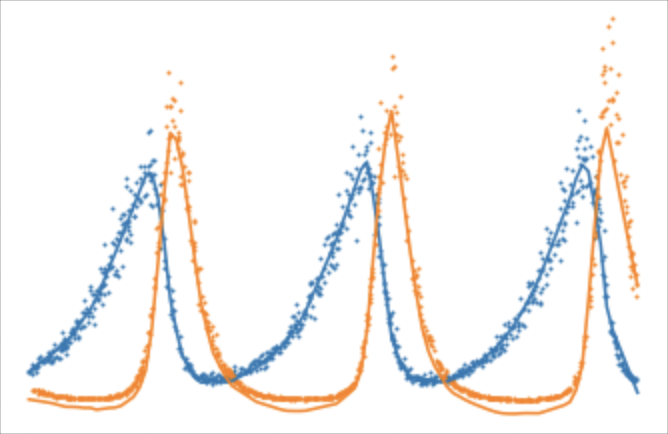

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
# from scipy.optimize import curve_fit # fixme: comentado porque creo que no se usa, si no se rompe nada, la puedo borrar.


HIDDEN_DIM = 32  # Define hidden dimension here # Fixme: esto lo agregué yo. # fixme: creo que tiene que corresponderse con el largo de DATASET_TYPE, en este caso es un float32 (pero esto también lo elegí yo arbitrariamente).
BATCH_SIZE = 32  # Fixme: esto lo agregué yo porque el ejercicio original tenía BATCH_SIZE, pero en ningún lado lo instanciaba. Fixme: probar con distintos valores de BATCH_SIZE a ver cómo cambia la performance.
DATASET_TYPE = np.float32
EPOCHS = 300
# Set pandas display options to show more precision
pd.set_option('display.precision', 16) # Fixme: esto es solo para debugging, cuando lo termine, puedo borrar esta línea. # Fixme: tengo que ver que pasa si cambio la precisssion, ya vi que si pongo mayor a 16, aparecen valore que no están en el csv, tengo que estar seguro de que estos valores no afectan cálculos posteriores.

In [11]:
url_datasset = 'https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887'

In [12]:
# fixme: tener cuidado con esto:
"""
If your loss remains at 0 for many iterations in a regression problem, it usually indicates that your model has perfectly fit the data points in your training set, predicting the exact target values. However, this situation can arise from several scenarios, some desirable and some problematic:

Possible Reasons:
Perfect Fit:
Your model has learned the relationship between input and output so well that it predicts the exact values, resulting in a perfect fit. This might occur in simple problems with straightforward relationships or small datasets.

Data Leakage:
There could be data leakage where the model has access to information it shouldn't have during training, such as target values or correlated features from the test set, leading to a perfect prediction.

Overfitting:
If your model is overly complex relative to the data size (e.g., using a deep neural network on a small dataset), it might memorize the training data perfectly, resulting in zero loss on the training set but poor performance on unseen data.

Inadequate Loss Calculation or Implementation Error:
A bug in your loss function implementation or evaluation loop might always return zero, making it appear as though the model is performing perfectly when it might not be.

Extremely Simple Problem:
In some very straightforward regression tasks, the relationship between inputs and outputs might be so direct that the model has no difficulty predicting the exact values.

What to Do:
Check Validation/Testing Performance: Ensure that you evaluate your model on a separate validation or test set to confirm that it generalizes well. If the loss is zero only on training data, but much higher on validation or test data, overfitting is likely.

Inspect for Data Leakage: Review your data preprocessing and ensure that no information from the target variables is leaking into your input features during training.

Examine Your Loss Function: Double-check the implementation of your loss function to make sure it's correctly calculating the loss. Print intermediate values if necessary to verify.

Simplify Your Model: If the model is highly complex, consider simplifying it or using regularization techniques to prevent overfitting.

If you need help diagnosing this further, feel free to share more details about your model and dataset setup!
"""

"\nIf your loss remains at 0 for many iterations in a regression problem, it usually indicates that your model has perfectly fit the data points in your training set, predicting the exact target values. However, this situation can arise from several scenarios, some desirable and some problematic:\n\nPossible Reasons:\nPerfect Fit:\nYour model has learned the relationship between input and output so well that it predicts the exact values, resulting in a perfect fit. This might occur in simple problems with straightforward relationships or small datasets.\n\nData Leakage:\nThere could be data leakage where the model has access to information it shouldn't have during training, such as target values or correlated features from the test set, leading to a perfect prediction.\n\nOverfitting:\nIf your model is overly complex relative to the data size (e.g., using a deep neural network on a small dataset), it might memorize the training data perfectly, resulting in zero loss on the training set

In [13]:
# Fixme: falta testear, evaluar esta clase.

# The model uses three fully connected layers to balance model capacity and prevent overfitting.
# Three layers provide sufficient depth to learn complex non-linear relationships while minimizing risks
# of vanishing or exploding gradients, which are common in deeper networks. This configuration
# leverages the Universal Approximation Theorem, offering an optimal balance between simplicity
# and performance for the given noisy and incomplete time series regression task.

import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, HIDDEN_DIM)  # Input size is 3 (for 't', 'x', 'y', corresponding to time and two observed values), output size is HIDDEN_DIM,  output size is HIDDEN_DIM.
        self.relu = nn.ReLU()  # ReLU activation function introduces non-linearity to the model.
        self.fc2 = nn.Linear(HIDDEN_DIM, HIDDEN_DIM)  # Second fully connected layer for deeper representation. Input size is HIDDEN_DIM, output size is HIDDEN_DIM.
        # Output size is 2 (for predicting 'x' and 'y').
        self.fc3 = nn.Linear(HIDDEN_DIM, 2)   # Final layer outputs the two target values for regression. Input size is HIDDEN_DIM, output size is 2 (for predicting 'x' and 'y').

    def forward(self, x):
        x = self.fc1(x)  # Pass input through the first layer
        x = self.relu(x)  # Apply ReLU to introduce non-linearity
        x = self.fc2(x)  # Pass through the second fully connected layer to deepen representation
        x = self.relu(x)  # Apply ReLU again for further non-linearity
        x = self.fc3(x)  # Final layer to produce the regression outputs for 'x' and 'y'
        return x  # Return the output values


In [14]:
class TimeSeriesDataset(torch.utils.data.Dataset):

    def __init__(self, csv_url):
        # Load CSV file from URL into pandas DataFrame
        self.data = pd.read_csv(csv_url)

        # Round time column to a suitable precision
        self.data['t'] = self.data['t'].round(3)  # Round to 3 decimal places to reduce precision errors and simplify data

        # Replace "-" with NaN and convert x, y columns to float
        self.data['x'] = pd.to_numeric(self.data['x'], errors='coerce')
        self.data['y'] = pd.to_numeric(self.data['y'], errors='coerce')

        # Handle missing values (NaN) using forward fill and interpolation
        self.data['x'].fillna(method='ffill', inplace=True)  # Forward fill replaces NaNs with the last valid value, maintaining data continuity which is essential in time series where the previous value is assumed to hold until the next valid observation.
        self.data['y'].interpolate(method='linear', inplace=True)  # Linear interpolation fills NaNs by estimating values between surrounding points, creating smoother transitions and preserving the trend of the data without abrupt changes.

        # Fill NaN values in 'x' with the first valid value in the column
        first_valid_x = self.data['x'].dropna().iloc[0]   # Gets the first valid value in 'x' to handle residual NaNs
        self.data['x'].fillna(first_valid_x, inplace=True)  # Ensures no NaNs remain by filling with first valid value

        first_valid_y = self.data['y'].dropna().iloc[0]  # Get the first valid value in 'y' to handle residual NaNs
        self.data['y'].fillna(first_valid_y, inplace=True)  # Ensures no NaNs remain by filling with first valid value

    def __len__(self):
        return len(self.data)  # Returns the number of samples in the dataset

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()  # Converts tensor index to list for DataFrame access

        time = self.data.iloc[idx, 0]
        x = self.data.iloc[idx, 1]
        y = self.data.iloc[idx, 2]

        # Return 't', 'x', and 'y' as inputs, 'x' and 'y' as labels
        inputs = torch.tensor([time, x, y], dtype=torch.float32)  # Converts inputs to tensors for model compatibility
        labels = torch.tensor([x, y], dtype=torch.float32)        # Converts labels to tensors for training

        return inputs, labels # Returns inputs and labels for training the model

In [15]:
dataset = TimeSeriesDataset('https://gist.githubusercontent.com/tmramalho/51733432c88e2b834dbd70353849f887/raw/676636d9e8512963005a318cb9b98060feadb641/data.csv')

# Create a DataLoader to efficiently load data during training
trainloader = torch.utils.data.DataLoader(
    dataset,  # Pass the dataset object which provides samples
    batch_size=BATCH_SIZE,  # Defines the number of samples to be loaded per batch, crucial for managing memory and training speed
    shuffle=True,  # Shuffle the data at the start of each epoch to help the model generalize better by breaking any order in the data
    num_workers=2  # Number of subprocesses used for data loading; using more workers speeds up data loading by parallelizing the process
)

<ipython-input-14-326303f2de1c>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data['x'].fillna(method='ffill', inplace=True)  # Forward fill replaces NaNs with the last valid value, maintaining data continuity which is essential in time series where the previous value is assumed to hold until the next valid observation.


In [16]:
def loss_fn(outputs, labels):
  """
  Define the loss function used for training the neural network.

  Args:
    outputs (torch.Tensor): The output of the neural network.
    labels (torch.Tensor): The ground truth labels.

  Returns:
    loss (torch.Tensor): The computed loss.
  """
  # Initialize Mean Squared Error (MSE) loss function: it measures the average of the squares of the errors—that is, the difference between predicted values and the true values.
  criterion = nn.MSELoss()

  # Calculate the loss by comparing the model's predictions (outputs) with the actual labels (ground truth)
  loss = criterion(outputs, labels)

  # Return the computed loss value, which represents how far off the predictions are from the true values
  return loss

net = Net()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # Initialize Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.001 and momentum of 0.9. Momentum, in the context of optimization algorithms like Stochastic Gradient Descent (SGD), is a technique used to accelerate convergence and dampen oscillations during training. It's particularly useful in scenarios where the cost function (loss) has steep, narrow valleys, or when the training data is noisy.

In [17]:
dataset.data  # Display the loaded and preprocessed DataFrame containing the time series data.

,t,x,y
0,0.0000000000000000,1.1159124144549086,0.5759052335487023
1,0.0100000000000000,1.1159124144549086,0.5513106076237239
2,0.0200000000000000,1.1159124144549086,0.5267159816987456
3,0.0300000000000000,1.1159124144549086,0.5021213557737672
4,0.0400000000000000,1.0054825084650338,0.4775267298487888
...,...,...,...
1995,19.9499999999999993,0.6079444564717553,4.1863610582149597
1996,19.9600000000000009,0.6079444564717553,4.1863610582149597
1997,19.9699999999999989,0.6079444564717553,4.1863610582149597
1998,19.9800000000000004,0.6229927832618664,4.1863610582149597


In [18]:
for epoch in range(EPOCHS): # Loop over the dataset multiple times (EPOCHS for training)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad() # Clear gradients from the previous step to avoid accumulation

        # forward + backward + optimize
        outputs = net(inputs) # Forward pass: compute the network's predictions on the inputs
        loss = loss_fn(outputs, labels) # Calculate the loss between predictions and actual labels
        loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step() # Update model parameters using the computed gradients

        # Add a print statement to label the columns before printing statistics
        if epoch == 0 and i == 0:  # Print labels only once at the start of the training process
            print('[Epoch, Batch] Average Loss')  # Print labels for the columns

        # print statistics
        running_loss += loss.item()  # Accumulate the loss value for tracking progress
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))  # Print epoch, batch number, and average loss
            running_loss = 0.0 # Reset running loss after printing

print('Finished Training')

[Epoch, Batch] Average Loss
[1,    20] loss: 6.551
[1,    40] loss: 1.117
[1,    60] loss: 0.196
[2,    20] loss: 0.055
[2,    40] loss: 0.026
[2,    60] loss: 0.023
[3,    20] loss: 0.016
[3,    40] loss: 0.011
[3,    60] loss: 0.012
[4,    20] loss: 0.009
[4,    40] loss: 0.007
[4,    60] loss: 0.008
[5,    20] loss: 0.007
[5,    40] loss: 0.006
[5,    60] loss: 0.005
[6,    20] loss: 0.005
[6,    40] loss: 0.005
[6,    60] loss: 0.005
[7,    20] loss: 0.005
[7,    40] loss: 0.004
[7,    60] loss: 0.004
[8,    20] loss: 0.004
[8,    40] loss: 0.004
[8,    60] loss: 0.004
[9,    20] loss: 0.003
[9,    40] loss: 0.004
[9,    60] loss: 0.003
[10,    20] loss: 0.003
[10,    40] loss: 0.003
[10,    60] loss: 0.003
[11,    20] loss: 0.003
[11,    40] loss: 0.003
[11,    60] loss: 0.003
[12,    20] loss: 0.003
[12,    40] loss: 0.003
[12,    60] loss: 0.002
[13,    20] loss: 0.002
[13,    40] loss: 0.002
[13,    60] loss: 0.002
[14,    20] loss: 0.002
[14,    40] loss: 0.002
[14,    60] los

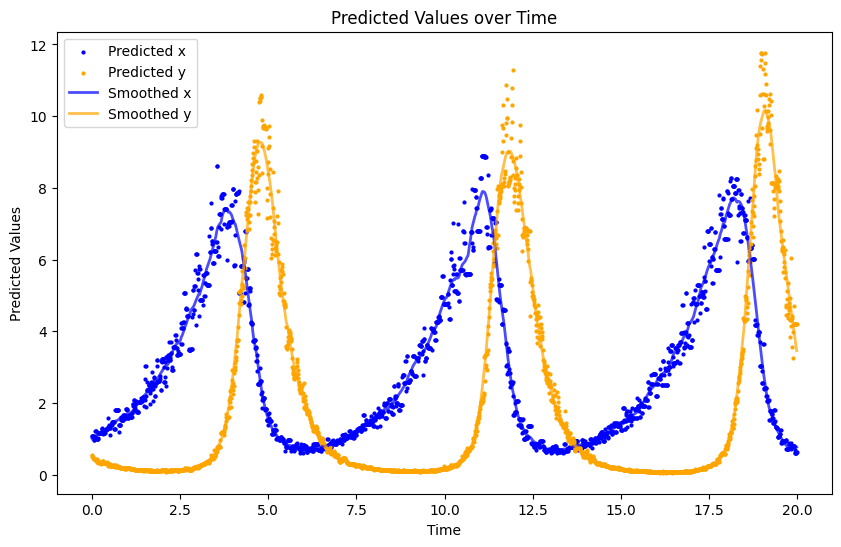

In [34]:
# Plot results to validate training
# Fixme: revisar si los plots tienen sentido, creo que los puntos son los datos del CSV y lo la linea conínua son las predicciones del moedelo.
# Fixme: revisar y entender bien esta celda.
net.eval()  # Set the model to evaluation mode

predicted_x = []
predicted_y = []
time_values = []

# Iterate over the dataset to gather predictions and time values
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs)

        predicted_x.extend(outputs[:, 0].tolist())
        predicted_y.extend(outputs[:, 1].tolist())
        time_values.extend(inputs[:, 0].tolist())

# Convert lists to numpy arrays for plotting
predicted_x = np.array(predicted_x)
predicted_y = np.array(predicted_y)
time_values = np.array(time_values)

# fixme: if I use this, bring it to the top of this section.
from scipy.ndimage import gaussian_filter1d  # Importing Gaussian filter

# Sort the values by time to plot the line correctly
sorted_indices = np.argsort(time_values)
sorted_time_values = time_values[sorted_indices]
sorted_predicted_x = predicted_x[sorted_indices]
sorted_predicted_y = predicted_y[sorted_indices]

# Apply Gaussian filtering to smooth the sorted predicted values
gaussian_predicted_x = gaussian_filter1d(sorted_predicted_x, sigma=5)
gaussian_predicted_y = gaussian_filter1d(sorted_predicted_y, sigma=5)

# Plotting Section with Smooth Lines using Savitzky-Golay Filter
plt.figure(figsize=(10, 6))

# Scatter plot for predicted values colored by 'x' and 'y'
plt.scatter(time_values, predicted_x, color='blue', s=4, label='Predicted x')
plt.scatter(time_values, predicted_y, color='orange', s=4, label='Predicted y')

# Plot the smoothed lines
plt.plot(sorted_time_values, smooth_predicted_x, color='blue', alpha=0.7, linewidth=2, label='Smoothed x')  # Smooth line for x values
plt.plot(sorted_time_values, smooth_predicted_y, color='orange', alpha=0.7, linewidth=2, label='Smoothed y')  # Smooth line for y values

plt.xlabel('Time')
plt.ylabel('Predicted Values')
plt.title('Predicted Values over Time')
plt.legend()

plt.show()

# Part 2-2 Time-series extension

The simplified model above will only work well if $t\in[0,20]$.
Create a different model that can extrapolate `x,y` predictions to $t>20$.
Assume that the model has access to the same data as above, and is tasked to predict up to $t=100$. You can change anything in the above setup as needed, including model architecture, loss function, training procedure or data loader.

There are several different correct approaches to tackle this problem, all with different pros and cons, so make sure to explain your reasoning for the different choices made.


### Fixme: explanation of GPT:

The simplified model above will only work well if t∈[0,20] because it was trained on data within this range. Extrapolating beyond this range means predicting values for t>20 without having seen data for these values during training. Neural networks, especially MLPs, are known to struggle with extrapolation tasks since they are primarily designed to interpolate within the range of the training data.

Given the cyclical nature of the data and the requirement to predict up to t = 100 using data available up to t = 20, a few strategies can be employed:

1. Recognize the cyclical pattern and leverage it for extrapolation.
2. Employ a more advanced model capable of capturing long-term dependencies and periodic behavior.

### Strategy
#### 1. Cyclical Pattern Recognition:

Since the data is cyclical, we can use this to our advantage by identifying the period and using models that can leverage this information.

#### 2. Advanced Model:

Use a Recurrent Neural Network (RNN) with a focus on Long Short-Term Memory (LSTM) networks or Gated Recurrent Units (GRUs) which are good at learning from time-series data.
Consider Fourier Transforms to identify dominant frequencies if the cycles are not obvious.

#### 3. Data Preparation:

Even though we only have data up to t=20, the model should learn the cyclical pattern within this range and use it for extrapolation.


#### Data Preparation

In [21]:
# Fixme: leer de LSTMs antes de la entrevista.
#Fixme: pedir explicaciones a GPT de todas las funciones de esta sección.

In [22]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Load the data
data = pd.read_csv('/data.csv')

# Replace specific non-numeric values with NaN
data.replace("-", np.nan, inplace=True)  # Replacing "-" with NaN

# Convert columns to numeric, setting errors='coerce' will replace non-numeric values with NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Round time column to a suitable precision
data['t'] = data['t'].round(3)  # Round to 3 decimal places

# Handle missing values
# Forward fill for 'x'
data['x'].fillna(method='ffill', inplace=True)  # Forward fill

# Linear interpolation for 'y'
data['y'].interpolate(method='linear', inplace=True)  # Linear interpolation

# Fill remaining NaNs in 'x' and 'y' with the first valid value
first_valid_x = data['x'].dropna().iloc[0]  # Get the first valid value in 'x'
data['x'].fillna(first_valid_x, inplace=True)  # Fill NaNs in 'x'

first_valid_y = data['y'].dropna().iloc[0]  # Get the first valid value in 'y'
data['y'].fillna(first_valid_y, inplace=True)  # Fill NaNs in 'y'

class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length
        self.x = data['t'].values
        self.y = data[['x', 'y']].values

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x_seq = self.x[idx:idx + self.seq_length]
        y_seq = self.y[idx:idx + self.seq_length]
        return torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)

# Sequence length
seq_length = 20

# Create the dataset and dataloader
dataset = TimeSeriesDataset(data, seq_length)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


FileNotFoundError: [Errno 2] No such file or directory: '/data.csv'

#### LSTM Model and Training Loop

In [ ]:
# Fixme: experimentar un poco con los parámetros de incialización para ver cómo obtener mejores resultados.
# Fixe: leer estas celdas para entender bien la solución.
# Fixme: pedir a GPT comentarios sobre esta clase.
# Fixme: revisar cómo progresa la loss function durante el entrenamiento, me llama la atención que a veces suba y a veces baje (aunque creo que es normal).
# Fixme: puede que esta solución no esté preidiendo lo suficientemente bien porque la loss no es tan buena como en el ejercicio 2.1 (notar que en ese ejercicio llega a 0.001 y en este por arriba de 0.1)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = 1
hidden_size = 50
num_layers = 2
output_size = 2

model = LSTMNet(input_size, hidden_size, num_layers, output_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 300
model.train()
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        inputs = inputs.unsqueeze(-1).to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels[:, -1, :])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


#### Prediction

In [ ]:
# Prediction
model.eval()
with torch.no_grad():
    future_steps = 80  # predict up to t = 100 (20 + 80)
    predictions = []
    input_seq = torch.tensor(data[['t']].values[-seq_length:]).unsqueeze(0).float().to(device)

    for _ in range(future_steps):
        pred = model(input_seq)  # Shape: (1, 2)

        # Save the prediction
        predictions.append(pred.cpu().numpy())

        # Prepare the input for the next prediction
        # Note: Since model outputs 2 features, we need to update input_seq with 1 feature
        pred = pred.unsqueeze(1)  # Shape: (1, 1, 2)

        # Update input_seq for the next iteration
        # To match dimensions, use pred[:, :, 0:1] for single feature
        input_seq = torch.cat((input_seq[:, 1:, :], pred[:, :, 0:1]), dim=1)  # Ensure dimensions match

predictions = np.array(predictions).squeeze()


In [ ]:
# Fixme: los plots me parecen raros, me parece que debrían seguir el patrón inicial de la data que me dan.

In [ ]:
import matplotlib.pyplot as plt

# Historical data for plotting
historical_time = data['t'].values
historical_x = data['x'].values
historical_y = data['y'].values

# Predict future data
model.eval()
with torch.no_grad():
    # Use the last seq_length data to start predicting
    input_seq = torch.tensor(data[['t']].values[-seq_length:]).unsqueeze(0).float().to(device)
    future_steps = 80
    future_time = np.arange(historical_time[-1] + 1, historical_time[-1] + future_steps + 1)
    future_x = []
    future_y = []

    for _ in range(future_steps):
        pred = model(input_seq)  # Shape: (1, 2)
        future_x.append(pred[0, 0].cpu().numpy())
        future_y.append(pred[0, 1].cpu().numpy())

        # Prepare the input for the next prediction
        pred = pred.unsqueeze(1)  # Shape: (1, 1, 2)
        input_seq = torch.cat((input_seq[:, 1:, :], pred[:, :, 0:1]), dim=1)  # Ensure dimensions match

# Convert lists to numpy arrays for plotting
future_x = np.array(future_x)
future_y = np.array(future_y)

# Plotting
plt.figure(figsize=(12, 6))

# Historical data
plt.scatter(historical_time, historical_x, color='blue', s=4, label='Historical x')
plt.scatter(historical_time, historical_y, color='orange', s=4, label='Historical y')

# Predictions
plt.plot(future_time, future_x, color='blue', linestyle='--', label='Predicted x')
plt.plot(future_time, future_y, color='orange', linestyle='--', label='Predicted y')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Historical and Predicted Values over Time')
plt.legend()

plt.show()

### Solution 2 (incorporating cyclical features directly into the model)

Given I observe that the historical x and y have a cyclical behaviour that it's not continued on the predictons of my model, I propose a second soulution in which I incorporate the cyclical features directly into the model to better capture the cyclical nature of the data. A common technique is to use sinusoidal transformations for time features.

In [ ]:
# Fixme: leer, ordenar y comentar código de abajo
# Probar modificando lo siguiente para ver si puedo mejorar los resultados: Increase Epochs and Fine-Tune Hyperparameters: Sometimes, increasing the number of epochs and experimenting with different hyperparameters (e.g., learning rate, batch size) can improve the model’s performance.
# Fixme: puede que esta solución no esté preidiendo lo suficientemente bien porque la loss no es tan buena como en el ejercicio 2.1 (notar que en ese ejercicio llega a 0.001 y en este no sé, tengo que printearla para ver cómo da)

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Add cyclical features
def add_cyclical_features(data, column_name):
    data[f'{column_name}_sin'] = np.sin(2 * np.pi * data[column_name] / data[column_name].max())
    data[f'{column_name}_cos'] = np.cos(2 * np.pi * data[column_name] / data[column_name].max())
    return data

# Load and preprocess data
data = pd.read_csv('/data.csv')
data.replace("-", np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data['t'] = data['t'].round(3)
data = add_cyclical_features(data, 't')

# Handle missing values
data['x'].fillna(method='ffill', inplace=True)
data['y'].interpolate(method='linear', inplace=True)
data['x'].fillna(data['x'].dropna().iloc[0], inplace=True)
data['y'].fillna(data['y'].dropna().iloc[0], inplace=True)

class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length
        self.x = data[['t_sin', 't_cos']].values  # Updated to include cyclical features
        self.y = data[['x', 'y']].values

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x_seq = self.x[idx:idx + self.seq_length]
        y_seq = self.y[idx:idx + self.seq_length]
        return torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)

# DataLoader and LSTM Model
seq_length = 20
dataset = TimeSeriesDataset(data, seq_length)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = 2  # Matching the number of features in the input
hidden_size = 50
num_layers = 2
output_size = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMNet(input_size, hidden_size, num_layers, output_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 300
model.train()
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        inputs = inputs.to(device)  # Shape: [batch_size, seq_length, input_size]
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels[:, -1, :])  # Compare with the last sequence output

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Prediction
model.eval()
with torch.no_grad():
    future_steps = 80  # Predict up to t = 100 (20 + 80)
    predictions = []
    input_seq = torch.tensor(data[['t_sin', 't_cos']].values[-seq_length:]).unsqueeze(0).float().to(device)  # Shape: [1, seq_length, input_size]

    for _ in range(future_steps):
        pred = model(input_seq)  # Shape: (1, 2)
        predictions.append(pred.cpu().numpy().flatten())  # Flatten to match the shape

        # Prepare the input for the next prediction
        pred = pred.unsqueeze(1)  # Shape: (1, 1, 2)
        input_seq = torch.cat((input_seq[:, 1:, :], pred), dim=1)  # Ensure dimensions match

# Convert lists to numpy arrays for plotting
predictions = np.array(predictions)
future_time = np.arange(data['t'].values[-1] + 1, data['t'].values[-1] + future_steps + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(data['t'], data['x'], color='blue', s=4, label='Historical x')
plt.scatter(data['t'], data['y'], color='orange', s=4, label='Historical y')
plt.plot(future_time, predictions[:, 0], color='blue', linestyle='--', label='Predicted x')
plt.plot(future_time, predictions[:, 1], color='orange', linestyle='--', label='Predicted y')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Historical and Predicted Values over Time')
plt.legend()
plt.show()


#### Solution 3 (Bidirectional LSTM Model)

I observe that the model is still not able capture the cyclcal nature of the data in it's predictions. To address the issue and improve the results, I use more advanced architectures. The plan is to switch to using Bidirectional LSTMs.

In [ ]:
# fixme: revisar y comentar código de abajo.
# fixme: para la siguiente celda, agregar prits como en las soluciones anteriores para tener constancia de que el entrenamiento está avanzando.
# fixme: no sé por qué la celda de abajo tarda tanto en ejecutar, antes no tardaba tanto.
# Fixme: puede que esta solución no esté preidiendo lo suficientemente bien porque la loss no es tan buena como en el ejercicio 2.1 (notar que en ese ejercicio llega a 0.001 y en este por arriba de 0.1)
# Fixme: esto está tardando un montón y ya no predice relativmamente bien hasta t=30 como lo hacía antes, mejorar.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Data preprocessing functions
def add_cyclical_features(data, column_name):
    data[f'{column_name}_sin'] = np.sin(2 * np.pi * data[column_name] / data[column_name].max())
    data[f'{column_name}_cos'] = np.cos(2 * np.pi * data[column_name] / data[column_name].max())
    return data

# Load and preprocess data
data = pd.read_csv('/data.csv')
data.replace("-", np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data['t'] = data['t'].round(3)
data = add_cyclical_features(data, 't')

# Handle missing values
data['x'].fillna(method='ffill', inplace=True)
data['y'].interpolate(method='linear', inplace=True)
data['x'].fillna(data['x'].dropna().iloc[0], inplace=True)
data['y'].fillna(data['y'].dropna().iloc[0], inplace=True)

class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length
        self.x = data[['t_sin', 't_cos']].values  # Changed to use cyclical features
        self.y = data[['x', 'y']].values

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x_seq = self.x[idx:idx + self.seq_length]
        y_seq = self.y[idx:idx + self.seq_length]
        return torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)

# DataLoader and Bidirectional LSTM Model
seq_length = 20
dataset = TimeSeriesDataset(data, seq_length)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

class BiLSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiLSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Bidirectional doubles the hidden_size

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)  # *2 for bidirectional
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)  # *2 for bidirectional
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = 2  # Input size for cyclical features
hidden_size = 50
num_layers = 2
output_size = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BiLSTMNet(input_size, hidden_size, num_layers, output_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 300
model.train()
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        inputs = inputs.to(device)  # Shape: [batch_size, seq_length, input_size]
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels[:, -1, :])  # Compare with the last sequence output

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Prediction
model.eval()
with torch.no_grad():
    future_steps = 80  # Predict up to t = 100 (20 + 80)
    predictions = []
    input_seq = torch.tensor(data[['t_sin', 't_cos']].values[-seq_length:]).unsqueeze(0).float().to(device)  # Shape: [1, seq_length, input_size]

    for _ in range(future_steps):
        pred = model(input_seq)  # Shape: (1, 2)
        predictions.append(pred.cpu().numpy().flatten())  # Flatten to shape (2,)

        # Prepare the input for the next prediction
        pred = pred.unsqueeze(1)  # Shape: (1, 1, 2)
        input_seq = torch.cat((input_seq[:, 1:, :], pred), dim=1)  # Ensure dimensions match

# Convert lists to numpy arrays for plotting
predictions = np.array(predictions)
predictions_x = predictions[:, 0]
predictions_y = predictions[:, 1]
future_time = np.arange(data['t'].values[-1] + 1, data['t'].values[-1] + future_steps + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(data['t'], data['x'], color='blue', s=4, label='Historical x')
plt.scatter(data['t'], data['y'], color='orange', s=4, label='Historical y')
plt.plot(future_time, predictions_x, color='blue', linestyle='--', label='Predicted x')
plt.plot(future_time, predictions_y, color='orange', linestyle='--', label='Predicted y')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Historical and Predicted Values over Time')
plt.legend()
plt.show()


#### Solution 4 (GRUs)

This alternative solution, improves a little the capture of the cyclical nature of the data, specially up untill t ~= 30. But it can stil be improved. # fixme: si no vuelvo a mejorar la performance de la celda anterior, voy a tener que borrar este comentario.

I will now try an alternative: using a GRU, which is a type of recurrent network that can be less computationally intensive than LSTMs while still capturing important patterns.

In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

input_size = 2
hidden_size = 50
num_layers = 2
output_size = 2

model = GRUNet(input_size, hidden_size, num_layers, output_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop remains the same
# Training loop
num_epochs = 300
model.train()
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        inputs = inputs.to(device)  # Shape: [batch_size, seq_length, input_size]
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels[:, -1, :])  # Compare with the last sequence output

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Prediction
model.eval()
with torch.no_grad():
    future_steps = 80  # Predict up to t = 100 (20 + 80)
    predictions = []
    input_seq = torch.tensor(data[['t_sin', 't_cos']].values[-seq_length:]).unsqueeze(0).float().to(device)  # Shape: [1, seq_length, input_size]

    for _ in range(future_steps):
        pred = model(input_seq)  # Shape: (1, 2)
        predictions.append(pred.cpu().numpy().flatten())  # Flatten to shape (2,)

        # Prepare the input for the next prediction
        pred = pred.unsqueeze(1)  # Shape: (1, 1, 2)
        input_seq = torch.cat((input_seq[:, 1:, :], pred), dim=1)  # Ensure dimensions match

# Convert lists to numpy arrays for plotting
predictions = np.array(predictions)
predictions_x = predictions[:, 0]
predictions_y = predictions[:, 1]
future_time = np.arange(data['t'].values[-1] + 1, data['t'].values[-1] + future_steps + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(data['t'], data['x'], color='blue', s=4, label='Historical x')
plt.scatter(data['t'], data['y'], color='orange', s=4, label='Historical y')
plt.plot(future_time, predictions_x, color='blue', linestyle='--', label='Predicted x')
plt.plot(future_time, predictions_y, color='orange', linestyle='--', label='Predicted y')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Historical and Predicted Values over Time')
plt.legend()
plt.show()


Still, not the results I expected.

# Part 3-1a

Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.

You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

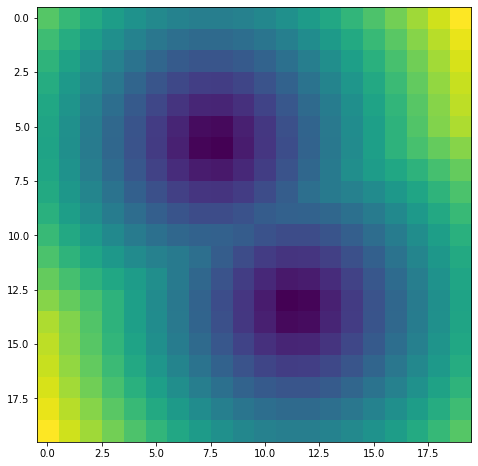


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

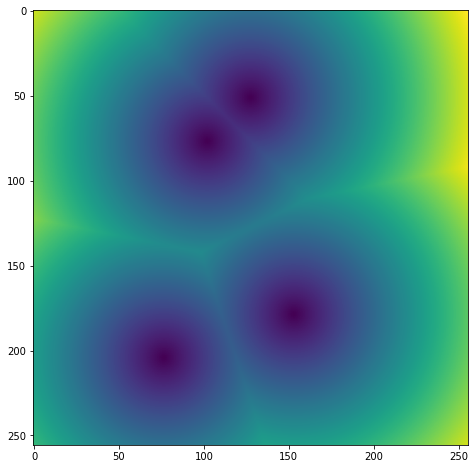


In [ ]:
# Fixme: función revisada y comentada, no hace falta aclarar nada, salvo que quiera repasar la solución.

def min_dist(points, res):
  """Calculates a 2D tensor with the minimum distance from each pixel to data.

  Inputs:
    * points: a python list of 2D coordinates, normalized in the range [0,1]
    * res: the resolution of the output tensor.
  Returns:
    A res x res square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points.
  """
  # Convert points to a tensor and normalize to [0, res-1] range
  points = torch.tensor(points, dtype=torch.float32) * (res - 1)

  # Create a grid of coordinates (x, y) for each pixel in the output tensor
  # `torch.linspace` generates `res` evenly spaced values between 0 and res-1 for both x and y
  x = torch.linspace(0, res - 1, res)
  y = torch.linspace(0, res - 1, res)

  # `torch.meshgrid` creates a coordinate grid using these vectors
  grid_x, grid_y = torch.meshgrid(x, y, indexing='xy')

  # Flatten the grid to have coordinates for each pixel
  # `grid_x.flatten()` and `grid_y.flatten()` convert the 2D grids into 1D vectors
  # `torch.stack` then combines these vectors into a single 2D tensor with shape (res*res, 2)
  grid_coords = torch.stack([grid_x.flatten(), grid_y.flatten()], dim=1)
  """
   The resulting grid_coords tensor provides a list of coordinates for each pixel in the 2D grid.
   Like the following:
   (tensor([[0., 0.],
        [1., 0.],
        [2., 0.],
        [3., 0.],
        [4., 0.],
        [0., 1.],
        [1., 1.],
        [2., 1.],
        [3., 1.],...)
   Each row in grid_coords corresponds to the (x, y) coordinates of a pixel in the original 2D space.
   This is useful for tasks that need to perform operations based on pixel locations.
  """

  # Compute the Euclidean distance from each pixel to each point
  # `torch.cdist` computes the pairwise Euclidean distances between each pixel and each point
  # grid_coords and points do not need to have the same shape, in teh example:
  # grid_coords.dim() torch.Size([400, 2])
  # points.dim() torch.Size([2, 2])
  dist = torch.cdist(grid_coords, points)
  """
  The dist tensor is a 2D tensor of shape [res * res, num_points], where:
  Each row corresponds to a pixel in the grid.
  Each column corresponds to a point from the input list of points.
  Each element dist[i, j] represents the Euclidean distance between the i-th pixel and the j-th point.
  """


  # Find the minimum distance to the nearest point
  # `torch.min` returns the minimum value along the specified dimension (dim=1, i.e., across each row).
  # [0] is used to get the minimum values themselves, not their indices
  min_dist = torch.min(dist, dim=1)[0]

  # Reshape to the resolution of the output tensor
  # `min_dist.reshape(res, res)` reshapes the 1D tensor of minimum distances back into a 2D tensor
  min_dist = min_dist.reshape(res, res)

  return min_dist

In [ ]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

In [ ]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

# Part 3-1b: Batched version

As a next step, improve the `min_dist` function to support batches.
The `points` array is now expected to be a tensor with shape [batch_size, num_points, 3], generated by `create_points`.
`min_dist` should return a batch of maps with shape [batch_size, res, res].
Again, make sure to implement `min_dist` using **no for-loops**.
Demonstrate your function output with `batch_size=3` and `num_points=4`.

In [ ]:
#Fixme: lo siguiente es agregado por mi, escrito por GPT:

To extend the min_dist function to support batched inputs, the following steps are excecuted:

1. Handle Batched Points: Adjust the function to process the input tensor with shape [batch_size, num_points, 2], which includes a batch dimension.

2. Compute Distances: For each batch, calculate the Euclidean distance from each pixel to each point. This requires expanding dimensions to properly handle the batch structure.

3. Find Minimum Distances: After computing the distances, determine the minimum distance for each pixel by evaluating distances across all points within the batch.

In [ ]:
# Fixme: esta función es dada por la consigna tal cuál está.
def create_points(batch_size, num_points):
  coords = np.random.rand(batch_size, num_points, 2)
  return coords

In [ ]:
def min_dist(points, res):
  """Calculates a 3D tensor with the minimum distance from each pixel to data.

  Inputs:
    * points: a numpy array of 2D coordinates and point values, normalized to
              be in the range [0,1]. The expected shape is [B, P, 2].
    * res: the resolution of the output tensor.
  Returns:
    A res x res square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points. The return tensor
    shape is [B, res, res].
  """
  # Convert points to a tensor if it's a list
  if isinstance(points, list):
      points = torch.tensor(points, dtype=torch.float32)
  else:
      points = torch.tensor(points, dtype=torch.float32)

  # Determine if the input is batched
  if points.dim() == 3:
      # Batched input: [batch_size, num_points, 2]
      batch_size, num_points, _ = points.shape
  elif points.dim() == 2:
      # Non-batched input: [num_points, 2]
      batch_size = 1
      num_points = points.shape[0]
      points = points.unsqueeze(0)  # Add batch dimension: [1, num_points, 2]
  else:
      raise ValueError("Invalid input shape for points.")

  # Create a grid of coordinates (x, y) for each pixel in the output tensor
  x = torch.linspace(0, 1, res)
  y = torch.linspace(0, 1, res)
  grid_x, grid_y = torch.meshgrid(x, y)

  # Flatten the grid to have coordinates for each pixel
  grid_coords = torch.stack([grid_x.flatten(), grid_y.flatten()], dim=1)

  # Expand dimensions to handle batch
  grid_coords = grid_coords.unsqueeze(0).expand(batch_size, -1, -1)  # Shape: [batch_size, res*res, 2]

  # Compute the Euclidean distance from each pixel to each point
  dist = torch.cdist(grid_coords, points.view(-1, 2))  # Shape: [batch_size, res*res, num_points]

  # Find the minimum distance to the nearest point
  min_dist = torch.min(dist, dim=2)[0]  # Shape: [batch_size, res*res]

  # Reshape to the resolution of the output tensor
  min_dist = min_dist.view(batch_size, res, res)  # Shape: [batch_size, res, res]

  return min_dist

In [ ]:
# Fixme: celda agregada por mi, siguiendo lo que plantea la consigna del ejercicio. Pero no estoy seguro de que el plot sea correcto.

import matplotlib.pyplot as plt

# Test the function with batched input
batch_size = 3
num_points = 4
points = create_points(batch_size, num_points)

# Compute distances
distance_to_data = min_dist(points, 20)

# Visualize one example from the batch (e.g., the first item)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data[0].detach().numpy(), cmap='viridis')  # Show the first batch item
plt.colorbar()
plt.title("Distance Map for Batch 1")
plt.show()


# Part 3-2: Scalable version

Assume `res` can be very large (up to 65,536). Running the above function will likely cause the computer's RAM to be filled up, and fail (on a free colab instance, even 16,384 `res` will crash with `batch_size=3` and `num_points=4`).
Extend the above version of `min_dist` to calculate the result tensor at such high resolution without running out of RAM. This function may be less computationally efficient, as long as it can successfully run.

### Solution 1 using for loops.

In [ ]:
# Fixme: estoy usando for loops y la consigna 3.1 pedía sin for loops, no sé si aplica para este ejercici.

In [ ]:
import torch
import numpy as np
import tempfile
import os
import matplotlib.pyplot as plt

In [ ]:
# Fixme: esta celda la agrego acá para no tener que ir a buscarla cada vez que me quedo sin RAM, después tengo que borrarla.
def create_points(batch_size, num_points):
  coords = np.random.rand(batch_size, num_points, 2)
  return coords

In [ ]:
def min_dist(points, res, grid_chunk_size=256, point_chunk_size=100):
    """Calculates a tensor with the minimum distance from each pixel to data in a scalable way.

    Args:
      * points: A tensor of shape [batch_size, num_points, 2] or [num_points, 2].
      * res: The resolution of the output tensor.
      * grid_chunk_size: Size of the grid chunks to process to handle large resolutions.
      * point_chunk_size: Size of the point chunks to process to handle large batches.

    Returns:
      A tensor with shape [batch_size, res, res] if batched input, otherwise [res, res].
    """
    # Convert points to a tensor if it's a list
    if isinstance(points, list):
        points = torch.tensor(points, dtype=torch.float32)
    else:
        points = torch.tensor(points, dtype=torch.float32)

    # Determine if the input is batched
    if points.dim() == 3:
        batch_size, num_points, _ = points.shape
    elif points.dim() == 2:
        batch_size = 1
        num_points = points.shape[0]
        points = points.unsqueeze(0)  # Add batch dimension: [1, num_points, 2]
    else:
        raise ValueError("Invalid input shape for points.")

    # Initialize the output tensor with temporary files for each batch
    temp_files = []
    for _ in range(batch_size):
        temp_file = tempfile.NamedTemporaryFile(delete=False)
        temp_files.append(temp_file.name)

    # Create a grid of coordinates (x, y) for each chunk
    x = torch.linspace(0, 1, res)
    y = torch.linspace(0, 1, res)
    x_chunks = [x[i:i+grid_chunk_size] for i in range(0, res, grid_chunk_size)]
    y_chunks = [y[j:j+grid_chunk_size] for j in range(0, res, grid_chunk_size)]

    def process_grid_chunk(x_chunk, y_chunk, chunk_idx):
        """Process a single grid chunk and return the min distance tensor."""
        grid_x, grid_y = torch.meshgrid(x_chunk, y_chunk, indexing='ij')
        grid_coords = torch.stack([grid_x.flatten(), grid_y.flatten()], dim=1).unsqueeze(0)  # Shape: [1, chunk_size*chunk_size, 2]

        # Store intermediate results for each batch in temporary files
        for batch_idx in range(batch_size):
            min_dist_chunk = torch.full((len(x_chunk), len(y_chunk)), float('inf'))
            num_point_chunks = (num_points + point_chunk_size - 1) // point_chunk_size
            for point_chunk_idx in range(num_point_chunks):
                start = point_chunk_idx * point_chunk_size
                end = min(start + point_chunk_size, num_points)
                points_chunk = points[batch_idx:batch_idx+1, start:end, :]  # Shape: [1, chunk_size, 2]

                # Compute distances
                dist = torch.cdist(grid_coords, points_chunk.view(-1, 2))  # Shape: [1, chunk_size*chunk_size, chunk_size]
                chunk_min_dist = torch.min(dist, dim=2)[0]  # Shape: [1, chunk_size*chunk_size]
                chunk_min_dist = chunk_min_dist.view(len(x_chunk), len(y_chunk))  # Shape: [grid_chunk_size, grid_chunk_size]

                # Update the min_dist_chunk tensor
                min_dist_chunk = torch.min(min_dist_chunk, chunk_min_dist)

            # Save to temporary file
            with open(temp_files[batch_idx], 'ab') as f:
                np.save(f, min_dist_chunk.cpu().numpy())

            print(f"Processed grid chunk ({batch_idx + 1}/{batch_size}), part {point_chunk_idx + 1}/{num_point_chunks}")

    # Process each chunk of the grid
    num_grid_chunks = len(x_chunks) * len(y_chunks)
    for grid_chunk_idx, (x_chunk, y_chunk) in enumerate([(x, y) for x in x_chunks for y in y_chunks]):
        process_grid_chunk(x_chunk, y_chunk, grid_chunk_idx)
        print(f"Processed grid chunk {grid_chunk_idx + 1}/{num_grid_chunks}")

    # Read the results from temporary files and combine them
    min_dist = torch.full((batch_size, res, res), float('inf'))
    try:
        for batch_idx in range(batch_size):
            offset_x = 0
            with open(temp_files[batch_idx], 'rb') as f:
                for x_chunk in x_chunks:
                    offset_y = 0
                    for y_chunk in y_chunks:
                        chunk_min_dist = np.load(f)
                        min_dist[batch_idx, offset_x:offset_x+len(x_chunk), offset_y:offset_y+len(y_chunk)] = torch.tensor(chunk_min_dist, dtype=torch.float32)
                        offset_y += len(y_chunk)
                    offset_x += len(x_chunk)
    finally:
        # Clean up the temporary files
        for temp_file in temp_files:
            os.remove(temp_file)

    return min_dist


In [ ]:
# Example usage
batch_size = 3
num_points = 4
res = 65536  # Fixme: Adjust resolution to 65536 for actual test
points = create_points(batch_size, num_points)

# Compute distances
distance_to_data = min_dist(points, res)  # Using a smaller resolution for demonstration

# Visualize one example from the batch (e.g., the first item)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data[0].detach().numpy(), cmap='viridis')  # Show the first batch item
plt.colorbar()
plt.title("Distance Map for Batch 1")
plt.show()